In [55]:
from IPython.display import display, HTML

import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
from tqdm import tqdm
import json
import io

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
import numpy as np
from scipy.spatial.distance import euclidean, pdist, squareform, cosine

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


sns.set(style="ticks")


plt.rcParams['axes.facecolor']='white'
task_order = ['Length',  'WordContent', 'Depth', 'TopConstituents', 'BigramShift', 'Tense', 'SubjNumber', 'ObjNumber', 'OddManOut', 'CoordinationInversion']
model_order = ['bert-base-uncased', 'bert-large-uncased', 'openai-gpt', 'gpt2', 'transfo-xl-wt103']
dict_task = {0:'Length',  1:'WordContent', 2:'Depth', 3:'TopConstituents', 4:'BigramShift', 5:'Tense', 6:'SubjNumber', 7:'ObjNumber', 8:'OddManOut', 9:'CoordinationInversion'}

def get_results(dir_path='./mlp_results'):
    columns = ['data_path', 'cache_path', 'result_path', 'batch_size', 'cbatch_size', 'nhid', 'optim', 'kfold', 'tenacity', 'usepytorch', 'epoch_size', 'device']
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        with open(join(dir_path, filename), 'r') as infile:
#             print(filename)
            results = json.load(infile)
            for key, result in results.items():
                list_result.append(result)
                
    df = pd.DataFrame(list_result)[['acc', 'head', 'layer', 'task', 'model_name']]
    
    for column in columns:
        try:
            df = df.drop(columns=column)
        except:
            pass

    return df

def get_multi_head_results(dir_path='./top_head_wise_results'):
    columns = ['data_path', 'cache_path', 'result_path', 'batch_size', 'cbatch_size', 'nhid', 'optim', 'kfold', 'tenacity', 'usepytorch', 'epoch_size', 'device']
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        with open(join(dir_path, filename), 'r') as infile:
#             print(filename)
            results = json.load(infile)
            for key, result in results.items():
                list_result.append(result)
                
    df = pd.DataFrame(list_result)[['acc', 'num_head', 'task', 'model_name']]
    
    for column in columns:
        try:
            df = df.drop(columns=column)
        except:
            pass

    return df

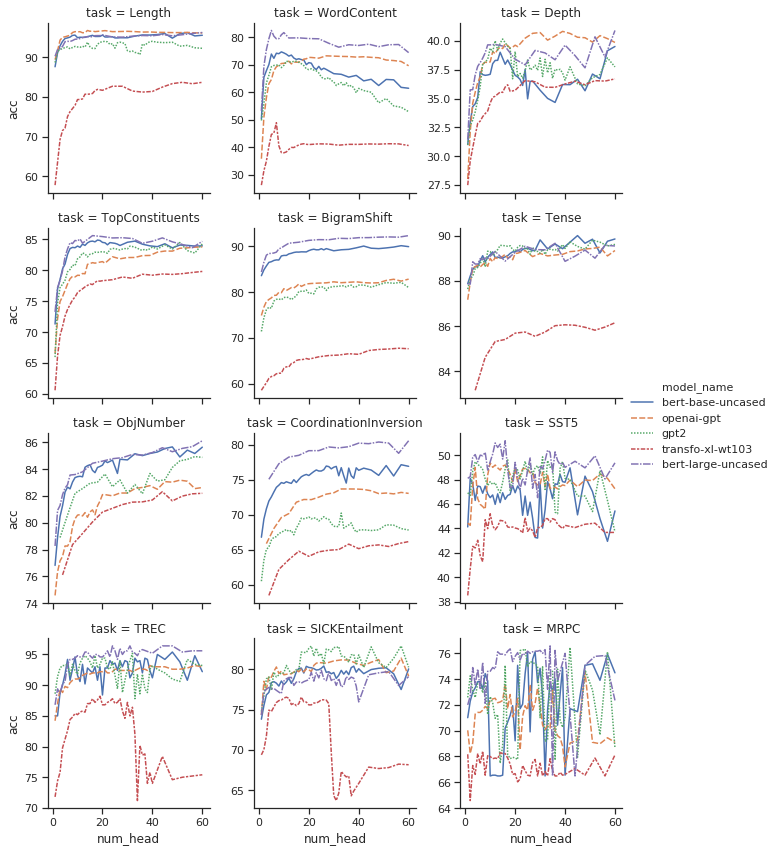

In [61]:


# Find top n head performance
df = get_multi_head_results(dir_path='./top_head_wise_results')
# df = df.loc[(df['model_name'] == 'openai-gpt') | (df['model_name'] == 'bert-base-uncased') | (df['model_name'] == 'bert-large-uncased')]
df = df.loc[df['task'] != 'OddManOut']
df = df.loc[df['task'] != 'SubjNumber']

df2 = get_multi_head_results(dir_path='./ds_top_head_wise_results')
df = pd.concat([df, df2])
df = df.loc[df['num_head'] <= 60]

g = sns.relplot(x='num_head', y='acc', hue='model_name', style='model_name', col='task', col_wrap=3, data=df, kind='line', facet_kws={'sharey':False}, height=3, legend='full')
g.savefig('effect_n_head.png')

